# Lecture 14: Gradient Descent

In Homework of week 5 we have seen the gradient descent method for a 1-variable function.
<br><br>
Today we will try to determine the how do we get to the minimum for a function $f(x,y)$. e.g., $f(x,y)$ could be the cost of a I will be putting to market and $x$ and $y$ could be certain dimensions of the product, or one could be price. Or $f(x,y)$ could the error with which my model with parameters $x$,$y$ is predicting the stock-market. 

Please think of one other situation when you would want to minimize a multi-variable function. 

<br>

Say, for example:

$$f(x,y) = x^2 + 4y^2 + 4x + y + 6$$

And we want to find the $(x,y)$ that minimizes $f(x,y)$. 

In [5]:
import numpy as np

In [ ]:
f = lambda x, y: x*x + 2*y*y + 4*x + y + 6

In [8]:
# Some of the following code are from matplotlib documentation and modified it to graph f.
# You don't need to know how to make 3d graphs but are more than welcome to learn it
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d # plotting surfaces
from matplotlib.colors import LogNorm # for later use, display colormap in log scale
from matplotlib import animation # for later use, animate the gradient descending process
from IPython.display import HTML # needed for rendering the video to html5 format
%matplotlib inline

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d', elev=30, azim=-50)

X = np.linspace(-20,20,300)
Y = np.linspace(-20,20,300)
X, Y = np.meshgrid(X,Y)
Z = f(X, Y)

# Plot a basic surface.
ax.plot_surface(X, Y, Z, cmap = 'jet', rstride=10, cstride=10, alpha=0.8)
plt.show()

<br>

So how do we find the $(x,y)$ that minimizes the function $f$? Here are three ideas, all of which work for our case. 

### Idea 1: Monte Carlo
Try a bunch of random values of $x$ and $y$. Keep the $x,y$ with the smallest values seen.

Not a bad idea in 2-dimensions. But will it work if $f$ were $f(x_1,x_2,x_3,..., x_{100})$ with lots of parameters instead of just two variables? No, because there are too many points to look at.

### Idea 2:  Math 2D
Look at the partial derivatives of $f$ and solve $\displaystyle\frac{\partial f}{\partial x}(x,y) = 0$ and $\displaystyle\frac{\partial f}{\partial y}(x,y) = 0$. The idea here is that at a local mininum, the partial derivatives will all be 0. 

This is great in our case because the partial derivatives are solved easily. But again, if we had lots and lots of parameters, e.g. $f(x_1,x_2,x_3,..., x_{100})$, we would have to solve 100 equations, this would be fine if all the partial derivatives were linear, but in general it's very hard to solve lots of non-linear equations. 

### Idea 3:  
Start at a point $(x,y)$ and "go downhill". 

**Fact from calculus:** At any point $(x,y)$, the gradient $\nabla f (x,y) = \displaystyle\left(\frac{\partial f}{\partial x}, \frac{\partial f}{\partial y}\right)$ will give the direction that makes $f$ increase the most. 

If $\nabla f (x,y)$ will give the direction of steepest ascent, then $- \nabla f (x,y)$ will give the direction of steepest descent (refer to Homework of Week 5). So I can re-write:

> Start at a a point and iteratively (in a loop) change $(x,y)$ to 

$$(x,y) - \eta \nabla f (x,y),$$
where $\eta$ is a small number; and this iterative process can be formulated as:

> Choose initial guess $(x_0,y_0)$ and step size (learning rate) $\eta$<br><br>
>    For $k=0,1,2, \cdots, M$<br><br>
>    &nbsp;&nbsp;&nbsp;&nbsp;    $(x_{k+1},y_{k+1}) =  (x_k,y_k) - \eta\nabla f(x_k,y_k) $

Notice in Idea 3 the iteration could go on and on, here for simplicity we only consider a fixed number of steps (refer HW of week 5 see the other two).

In [ ]:
f = lambda x, y: x*x + 2*y*y + 4*x + y + 6
partialfx = lambda x, y: 2*x + 4  # partial derivative of our function f with respect to x
partialfy = lambda x, y: 4*y + 1

# starting at (5,5) for no reason
x, y = 5, 5

# this is the rate at which we'll move to the opposite of the gradient
# called "learning rate" in machine learning
eta = 0.5

# total number of steps we will perform this descent
num_steps = 200

# we'll store all the intermediate values during the descent:
x_vals = np.zeros(num_steps)
y_vals = np.zeros(num_steps)
f_vals = np.zeros(num_steps)

for i in range(num_steps):
    # update x and y
    dx = partialfx(x, y)
    dy = partialfy(x, y)
    x = x - eta*dx
    y = y - eta*dy
    
    # let's store the x, y and f(x,y) values for later use
    x_vals[i] = x
    y_vals[i] = y
    f_vals[i] = f(x, y)

In [ ]:
x_vals.shape
y_vals[:20]

In [ ]:
print("Local minimum of f(x,y): ", f(x,y), "at point", (x,y))
# let's see what the f(x,y) values were    
plt.plot(range(num_steps), f_vals) # the changes of f(x,y) over these 200 iters
plt.show()

Let's also visualize what happens on a contour graph. 

This is the contour graph of $f$. The curves are the solutions to $f(x,y) = c$ where $c$ is the labeled number on each curve. 

In [ ]:
X = np.linspace(-20,20,300)
Y = np.linspace(-20,20,300)
X, Y = np.meshgrid(X,Y)
Z = f(X, Y)

plt.figure(figsize=(8, 6))
CS = plt.contour(X, Y, Z, [1, 4, 9, 16, 25, 36, 49, 64, 81, 
                           100, 121, 144, 169, 196], cmap='jet')
# the contour plot is when f(x,y) = the values above
plt.axis([-6,6,-10,10])
plt.clabel(CS, inline=True, fontsize=10)
plt.show()

Let's include the arrows for how gradient descent moves us. 

In [ ]:
plt.figure(figsize=(8, 6))
CS = plt.contour(X, Y, Z, [1, 4, 9, 16, 25, 36, 49, 64, 81, 
                           100, 121, 144, 169, 196], cmap='jet')
plt.axis([-6,6,-6,6])
plt.clabel(CS, inline=1, fontsize=10)
# let's plot every few times to avoid congestion of arrows in the picture
delta_n = 4
for i in range(0,99,delta_n):
#     plt.scatter(x_vals[i], y_vals[i])
    plt.arrow(x_vals[i], y_vals[i], (x_vals[i+delta_n] - x_vals[i]), 
              (y_vals[i+delta_n] - y_vals[i]), 
              head_width=0.3, head_length=0.2, linewidth = 1.5, color='red')

# plt.plot(x_vals, y_vals)
plt.show()

So our point $(x,y)$ is really going downhill towards the minimum!

## In-class exercise: 
What happens if you take $\eta$ (`eta`) to be too big? Try guessing what will happen and then go and try `eta = 0.45` in the code. 

## Numerical gradient (read after class):

The gradient descent method works really well not just for polynomial functions but all kinds of functions. How do we take derivatives in general though? Two ways:

* **Symbolic**: presumable we know the formula $f$ is, so we can take the derivative using our knowledge of derivatives. (that's what we did above)
* **Numerical**: we can numerically approximate using the definition of derivative:

$$\frac{d f}{d x}(x) = \lim_{h \rightarrow 0}\frac{f(x + h) - f(x)}{h} \approx \frac{f(x + h) - f(x)}{h}$$
when $h$ is small.
 
So, to numerically approximate the derivative, we could take $h = 0.00001$ for example.

Reference: a starter would be the [Wikipedia entry](https://en.wikipedia.org/wiki/Numerical_differentiation), a more advanced introduction would be a little piece written by my former Purdue colleague whom I took machine learning class from: [Finite Calculus:
A Tutorial for Solving Nasty Sums](https://www.cs.purdue.edu/homes/dgleich/publications/Gleich%202005%20-%20finite%20calculus.pdf)

In [ ]:
def num_derivative(f):
    h = 0.00001
    return (lambda x: (f(x+h)-f(x))/h) # return value is function

In [ ]:
f = lambda x: x*x
num_derivative(f)(1)

We can of course do it for partial derivatives:

In [6]:
def numpartialx(f):
    h = 0.00001
    return (lambda x, y: (f(x+h, y)-f(x, y))/h)

def numpartialy(f):
    h = 0.00001
    return (lambda x, y: (f(x, y+h)-f(x, y))/h)


We can then do gradient descent for any function without taking the partial derivatives by hand:

In [3]:
# this is now a function
def grad_descent(f, x0 = (0,0), eta=0.01, num_steps=200):
    # if we do not give x0 any value, then by default it is (0,0)
    # starting at some point
    x, y = x0[0], x0[1]

    x_vals = np.zeros(num_steps)
    y_vals = np.zeros(num_steps)
    f_vals = np.zeros(num_steps)

    for i in range(num_steps):
        # update x and y
        # numerical gradient
        dx, dy = numpartialx(f)(x,y), numpartialy(f)(x,y)
        x = x - eta*dx
        y = y - eta*dy

        # let's store the x, y and f(x,y) values for later use
        x_vals[i] = x
        y_vals[i] = y
        f_vals[i] = f(x, y)
    
    return x_vals, y_vals, f_vals

In [ ]:
x_vals, y_vals, f_vals = grad_descent(f, (-1,2), 0.1, 50)

print("Local minimum of f(x,y): ", f(x_vals[-1],y_vals[-1]), 
      "at point", (x_vals[-1],y_vals[-1]))
# let's see what the f(x,y) values were    
plt.plot(range(50), f_vals) # the changes of f(x,y) over these 200 iters
plt.show()

# An (in)famous benchmark: Beale function

Beale function is one of the [benchmark for testing your optimization algorithm](https://en.wikipedia.org/wiki/Test_functions_for_optimization):
$$\displaystyle f(x,y)=\left(1.5-x+xy\right)^{2}+\left(2.25-x+xy^{2}\right)^{2} 
+\left(2.625-x+xy^{3}\right)^{2}$$
We know that this function has the global minimum is achieved at $(3,0.5)$.

In [1]:
# beale function
f  = lambda x, y: (1.5 - x + x*y)**2 + (2.25 - x + x*y**2)**2 + (2.625 - x + x*y**3)**2

The value of f(x,y):  4.19944200169116 after 2000 iterations at point (1.0554988520843107, -0.4990398554720503)


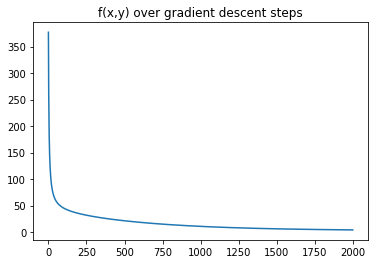

In [9]:
num_steps = 2000
x_vals, y_vals, f_vals = grad_descent(f, x0 = (-2,-2), eta = 1e-4, num_steps=num_steps)
print("The value of f(x,y): ", f(x_vals[-1],y_vals[-1]), "after", 
      num_steps, "iterations at point", (x_vals[-1],y_vals[-1]))
# let's see what the f(x,y) values were    
plt.title("f(x,y) over gradient descent steps")
plt.plot(range(num_steps), f_vals)
plt.show()

Let's see the contour too.

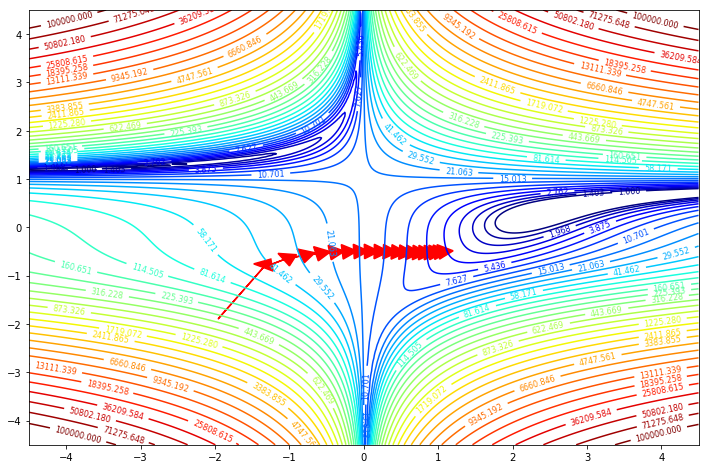

In [10]:
X = np.linspace(-4.5,4.5,300)
Y = np.linspace(-4.5,4.5,300)
X, Y = np.meshgrid(X,Y)
Z = f(X, Y)

# these 4 lines of code is plotting the contour
fig, ax = plt.subplots(figsize=(12, 8))
CS = ax.contour(X, Y, Z, levels=np.logspace(0, 5, 35), cmap='jet', norm = LogNorm())
plt.axis('tight')
ax.clabel(CS, inline=True, fontsize=8)

# let's plot the arrow every few times to avoid congestion of arrows in the picture
delta_n = 100
for i in range(0,num_steps-delta_n,delta_n):
    # plt.scatter(x_vals[i], y_vals[i])
    plt.arrow(x_vals[i], y_vals[i], (x_vals[i+delta_n] - x_vals[i]), 
              (y_vals[i+delta_n] - y_vals[i]), 
              head_width=0.3, head_length=0.2, linewidth = 1.5, color='red')

plt.show()

## Animation of the gradient descent
Please run the following cell to animate this process. You do not need to understand what I did here...

If Python complains about `RuntimeError: Requested MovieWriter (ffmpeg) not available`, please install FFmpeg package using Anaconda prompt by the following command either on your own computer and on the lab computer:
> conda install -c conda-forge ffmpeg

After you have done this, restart the kernel and run every cell.

In [ ]:
## the gradient descent path
path = np.array([x_vals, y_vals])
path = path[:,::10] # we dont plot too often

fig, ax = plt.subplots(figsize=(8, 6))
CS = ax.contour(X, Y, Z, levels=np.logspace(0, 5, 35), cmap='jet', norm = LogNorm())
plt.axis('tight')
ax.clabel(CS, inline=True, fontsize=8)
line, = ax.plot([], [], 'b', label='Gradient Descent', linewidth=3.0)
point, = ax.plot([], [], 'bo')

def init():
    line.set_data([], [])
    point.set_data([], [])
    return line, point

def animate(i):
    line.set_data(*path[::,:i])
    point.set_data(*path[::,i-1:i])
    return line, point

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=path.shape[1], interval=50, 
                               repeat_delay=20, blit=True)
HTML(anim.to_html5_video())

# Exercise 1
Try using gradient descent method on the following function with different starting point. Do you get the same result? Use the code above to plot the contour of this function, do you see why it is the case?

In [ ]:
f = lambda x, y: 2*np.sin(x) + x*x + y*y + 5*np.cos(y)

## Exercise 2
Try replace the numerical gradient formula by
$$\frac{f(x + h) - f(x - h)}{2h}$$ 
and repeat the gradient for Beale function above.
This will give you a much better estimate of the derivative with the same $h$. Why is it so?